In [1]:
#import dependencies

import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import os 
import pprint

#import gkey
from config import g_key

# Atlanta

In [2]:
# read in atlanta csv

atlanta_restaurant_totals = pd.read_csv("../Output/Data/atlanta_restaurants.csv")

In [3]:
atlanta_restaurant_totals


,Unnamed: 0,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,0,Little Bangkok,Atlanta,33.815930,-84.352190,30324,chinese,$$,4.0
1,1,Bao Bun Hibachi,Atlanta,33.801160,-84.414700,30318,chinese,$,4.5
2,2,Urban Wu,Atlanta,33.846710,-84.374065,30305,chinese,$$,4.0
3,3,Food Terminal,Atlanta,33.778829,-84.410034,30318,chinese,$$,4.5
4,4,Hibachi Buffet,Atlanta,33.841328,-84.327574,30329,chinese,$,4.5
...,...,...,...,...,...,...,...,...,...
1078,1078,Saigon Cafe - Cumberland,Atlanta,33.887040,-84.475595,30080,thai,$$,3.5
1079,1079,Thai Cafe,Atlanta,33.879660,-84.467664,30339,thai,NaN,2.5
1080,1080,T1 Bento,Atlanta,33.907766,-84.289732,30341,thai,$,4.0
1081,1081,Tin Drum Asian Kitchen - Akers Mill Square,Atlanta,33.882804,-84.462033,30339,thai,$,2.5


In [4]:

atlanta_summary_df = atlanta_restaurant_totals.groupby('ethnicity')

atlanta_summary_df.head()


,Unnamed: 0,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,0,Little Bangkok,Atlanta,33.815930,-84.352190,30324,chinese,$$,4.0
1,1,Bao Bun Hibachi,Atlanta,33.801160,-84.414700,30318,chinese,$,4.5
2,2,Urban Wu,Atlanta,33.846710,-84.374065,30305,chinese,$$,4.0
3,3,Food Terminal,Atlanta,33.778829,-84.410034,30318,chinese,$$,4.5
4,4,Hibachi Buffet,Atlanta,33.841328,-84.327574,30329,chinese,$,4.5
149,149,Le Colonial - Atlanta,Atlanta,33.837408,-84.380267,30305,french,NaN,4.5
150,150,Nikolai's Roof,Atlanta,33.761570,-84.383360,30303,french,$$$,4.0
151,151,Tiny Lou's,Atlanta,33.773360,-84.361350,30306,french,$$,4.0
152,152,Bistro Niko,Atlanta,33.846614,-84.368617,30326,french,$$,4.0
153,153,Cooks & Soldiers,Atlanta,33.786004,-84.411355,30318,french,$$,4.5


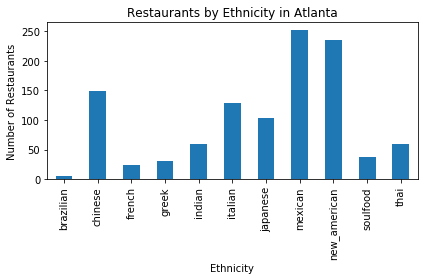

In [10]:
#create a bar chart for all ethnicities total restaurants


atl_ethnic_total= atlanta_summary_df['ethnicity'].count()

atl_ethnic_bar = atl_ethnic_total.plot(kind='bar')
atl_ethnic_bar.set_title("Restaurants by Ethnicity in Atlanta")
atl_ethnic_bar.set_xlabel("Ethnicity")
atl_ethnic_bar.set_ylabel("Number of Restaurants")
plt.savefig("../Output/Charts/barchart_rest_ethnicity_atlanta.png")

plt.tight_layout()
plt.show()




In [6]:
price_df = atlanta_restaurant_totals.dropna()
price_df['price_int'] = [ len(price) for price in price_df['price']]

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
# value counts for ethnicities

ethnic_counts = price_df['ethnicity'].value_counts()

ethnic_counts

new_american    200
mexican         186
chinese         125
italian         112
japanese         85
thai             50
indian           47
greek            29
soulfood         24
french           18
brazilian         4
Name: ethnicity, dtype: int64

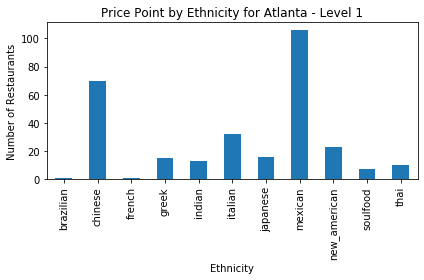

In [15]:
# Plot a bar chart for price level by ethnicity - price level 1

atl_ethnic_price1 = price_df[price_df['price_int']==1].groupby('ethnicity').count()['name'].plot(kind='bar')


#Set labels 
atl_ethnic_price1.set_xlabel("Ethnicity")
atl_ethnic_price1.set_ylabel("Number of Restaurants")
atl_ethnic_price1.set_title("Price Point by Ethnicity for Atlanta - Level 1")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price1_ethnicity_atlanta.png")
plt.show()

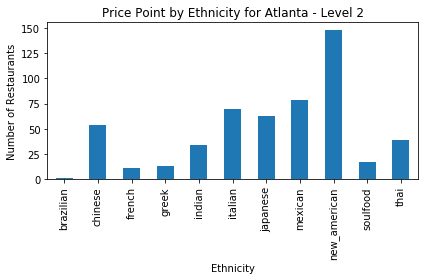

In [16]:
# Plot a bar chart for price level by ethnicity - price level 2

atl_ethnic_price2 = price_df[price_df['price_int']==2].groupby('ethnicity').count()['name'].plot(kind='bar')


#Set labels 
atl_ethnic_price2.set_xlabel("Ethnicity")
atl_ethnic_price2.set_ylabel("Number of Restaurants")
atl_ethnic_price2.set_title("Price Point by Ethnicity for Atlanta - Level 2")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price2_ethnicity_atlanta.png")
plt.show()

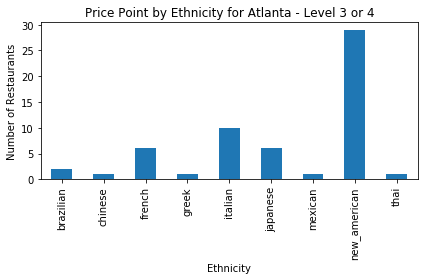

In [17]:
# Plot a bar chart for price level by ethnicity - price level 3 or 4

atl_ethnic_price34 = price_df[(price_df['price_int']==3)|(price_df['price_int']==4)].groupby('ethnicity').count()['name'].plot(kind='bar')

#Set labels 
atl_ethnic_price34.set_xlabel("Ethnicity")
atl_ethnic_price34.set_ylabel("Number of Restaurants")
atl_ethnic_price34.set_title("Price Point by Ethnicity for Atlanta - Level 3 or 4")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price34_ethnicity_atlanta.png")
plt.show()

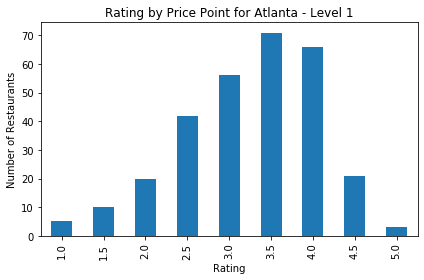

In [22]:
# Plot a bar chart price vs rating - 1 $

atl_rating_price1 = price_df[price_df['price_int']==1].groupby('rating').count()['name'].plot(kind='bar')

#Set labels 
atl_rating_price1.set_xlabel("Rating")
atl_rating_price1.set_ylabel("Number of Restaurants")
atl_rating_price1.set_title("Rating by Price Point for Atlanta - Level 1")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price_rating1_atlanta.png")
plt.show()

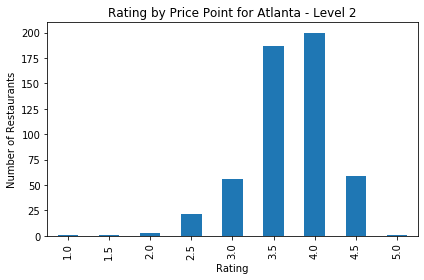

In [24]:
# Plot a bar chart price vs rating - 2 $

atl_rating_price2 = price_df[price_df['price_int']==2].groupby('rating').count()['name'].plot(kind='bar')

#Set labels 
atl_rating_price2.set_xlabel("Rating")
atl_rating_price2.set_ylabel("Number of Restaurants")
atl_rating_price2.set_title("Rating by Price Point for Atlanta - Level 2")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price_rating2_atlanta.png")
plt.show()

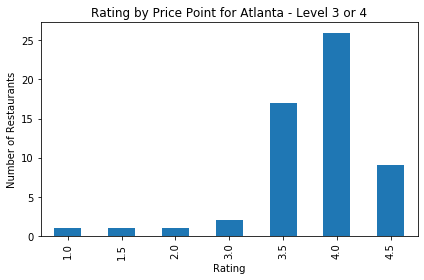

In [25]:
atl_rating_price34 = price_df[(price_df['price_int']==3)|(price_df['price_int']==4)].groupby('rating').count()['name'].plot(kind='bar')

#Set labels 
atl_rating_price34.set_xlabel("Rating")
atl_rating_price34.set_ylabel("Number of Restaurants")
atl_rating_price34.set_title("Rating by Price Point for Atlanta - Level 3 or 4")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price_rating34_atlanta.png")
plt.show()

In [26]:
#heat map

#configure gmaps
gmaps.configure(api_key=g_key)

#Use the Lat and Lng as locations 
atl_locations = price_df[["latitude", "longitude"]]
atl_prices = price_df["price_int"]

In [27]:
#Add Heatmap layer to map

atlanta_heatfig = gmaps.figure(center=(33.0, -83.0), zoom_level=5)
atlanta_max_intensity = np.max(atl_prices)

atlanta_heat_layer = gmaps.heatmap_layer(atl_locations, weights = atl_prices, dissipating=True, max_intensity=4, point_radius=5)

atlanta_heatfig.add_layer(atlanta_heat_layer)

atlanta_heatfig

Figure(layout=FigureLayout(height='420px'))

# Philadelphia

In [28]:
# read in philly csv

philly_restaurant_totals = pd.read_csv("../Output/Data/philadelphia_restaurants.csv")

In [29]:
philly_restaurant_totals

,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,Chubby Cattle,Philadelphia,39.954980,-75.156220,19107,chinese,NaN,4.5
1,Nan Zhou Hand Drawn Noodle House,Philadelphia,39.955401,-75.156901,19107,chinese,$,4.0
2,Dim Sum Garden,Philadelphia,39.955399,-75.156727,19107,chinese,$,4.0
3,Dim Sum House,Philadelphia,39.951885,-75.172466,19103,chinese,$$,4.0
4,Dan Dan,Philadelphia,39.950249,-75.167595,19102,chinese,$$,4.0
...,...,...,...,...,...,...,...,...
714,A Taste of Thai,Philadelphia,39.953852,-75.157628,19107,thai,$$,3.0
715,Aya Asian Fusion,Philadelphia,40.036950,-75.039910,19136,thai,$$,3.5
716,Mikado Thai Pepper Restaurant,Philadelphia,40.006550,-75.288880,19003,thai,$$,3.5
717,Dream House Asian Bistro,Philadelphia,40.034385,-75.216117,19128,thai,$$,3.0


In [31]:
philly_summary_df = philly_restaurant_totals.groupby('ethnicity')

philly_summary_df.head()

,name,city,latitude,longitude,zipcode,ethnicity,price,rating
0,Chubby Cattle,Philadelphia,39.954980,-75.156220,19107,chinese,NaN,4.5
1,Nan Zhou Hand Drawn Noodle House,Philadelphia,39.955401,-75.156901,19107,chinese,$,4.0
2,Dim Sum Garden,Philadelphia,39.955399,-75.156727,19107,chinese,$,4.0
3,Dim Sum House,Philadelphia,39.951885,-75.172466,19103,chinese,$$,4.0
4,Dan Dan,Philadelphia,39.950249,-75.167595,19102,chinese,$$,4.0
173,Parc,Philadelphia,39.949172,-75.170727,19103,french,$$$,4.0
174,The Wayward,Philadelphia,39.950915,-75.159596,19107,french,NaN,4.5
175,Gabi,Philadelphia,39.959250,-75.161510,19102,french,$$,4.5
176,Townsend,Philadelphia,39.951097,-75.176542,19103,french,$$$,4.5
177,Forsythia,Philadelphia,39.948707,-75.145394,19106,french,NaN,4.5


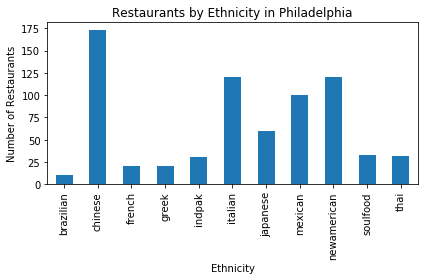

In [32]:
#create a bar chart for all ethnicities total restaurants


phl_ethnic_total= philly_summary_df['ethnicity'].count()

phl_ethnic_bar = phl_ethnic_total.plot(kind='bar')
phl_ethnic_bar.set_title("Restaurants by Ethnicity in Philadelphia")
phl_ethnic_bar.set_xlabel("Ethnicity")
phl_ethnic_bar.set_ylabel("Number of Restaurants")
plt.savefig("../Output/Charts/barchart_rest_ethnicity_philadelphia.png")

plt.tight_layout()
plt.show()

In [33]:
philly_price_df = philly_restaurant_totals.dropna()

philly_price_df['price_int'] = [ len(price) for price in philly_price_df['price']]

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
# value counts for ethnicities

ethnic_counts = philly_price_df['ethnicity'].value_counts()

ethnic_counts

chinese        113
newamerican    107
italian         93
mexican         68
japanese        48
thai            29
soulfood        20
indpak          19
greek           18
french          15
brazilian        5
Name: ethnicity, dtype: int64

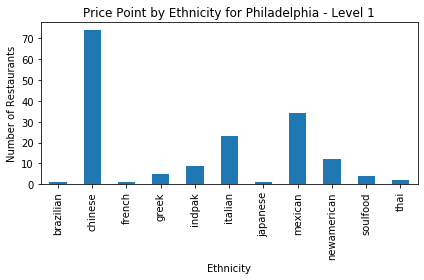

In [35]:
# Plot a bar chart for price level by ethnicity - price level 1

phl_ethnic_price1 = philly_price_df[philly_price_df['price_int']==1].groupby('ethnicity').count()['name'].plot(kind='bar')


#Set labels 
phl_ethnic_price1.set_xlabel("Ethnicity")
phl_ethnic_price1.set_ylabel("Number of Restaurants")
phl_ethnic_price1.set_title("Price Point by Ethnicity for Philadelphia - Level 1")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price1_ethnicity_philadelphia.png")
plt.show()

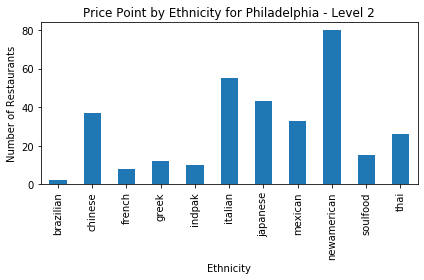

In [36]:
# Plot a bar chart for price level by ethnicity - price level 2

phl_ethnic_price2 = philly_price_df[philly_price_df['price_int']==2].groupby('ethnicity').count()['name'].plot(kind='bar')


#Set labels 
phl_ethnic_price2.set_xlabel("Ethnicity")
phl_ethnic_price2.set_ylabel("Number of Restaurants")
phl_ethnic_price2.set_title("Price Point by Ethnicity for Philadelphia - Level 2")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price2_ethnicity_philadelphia.png")
plt.show()

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


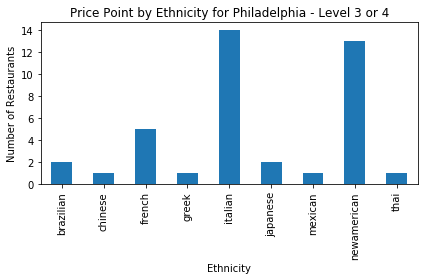

In [37]:
# Plot a bar chart for price level by ethnicity - price level 3 or 4

phl_ethnic_price34 = philly_price_df[(philly_price_df['price_int']==3)|(price_df['price_int']==4)].groupby('ethnicity').count()['name'].plot(kind='bar')

#Set labels 
phl_ethnic_price34.set_xlabel("Ethnicity")
phl_ethnic_price34.set_ylabel("Number of Restaurants")
phl_ethnic_price34.set_title("Price Point by Ethnicity for Philadelphia - Level 3 or 4")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price34_ethnicity_philadelphia.png")
plt.show()

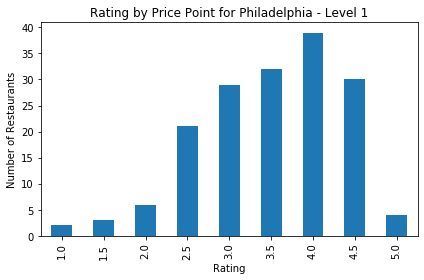

In [38]:
# Plot a bar chart price vs rating - 1 $

phl_rating_price1 = philly_price_df[philly_price_df['price_int']==1].groupby('rating').count()['name'].plot(kind='bar')

#Set labels 
phl_rating_price1.set_xlabel("Rating")
phl_rating_price1.set_ylabel("Number of Restaurants")
phl_rating_price1.set_title("Rating by Price Point for Philadelphia - Level 1")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price_rating1_philadelphia.png")
plt.show()

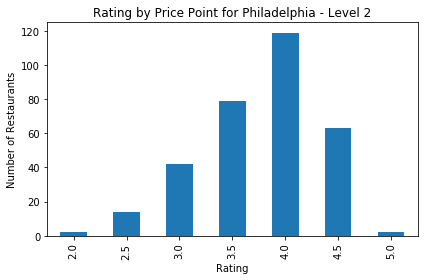

In [40]:
# Plot a bar chart price vs rating - 2 $

phl_rating_price2 = philly_price_df[philly_price_df['price_int']==2].groupby('rating').count()['name'].plot(kind='bar')

#Set labels 
phl_rating_price2.set_xlabel("Rating")
phl_rating_price2.set_ylabel("Number of Restaurants")
phl_rating_price2.set_title("Rating by Price Point for Philadelphia - Level 2")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price_rating2_philadelphia.png")
plt.show()

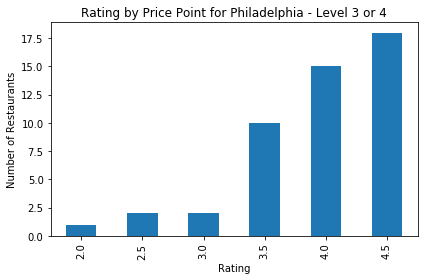

In [41]:
# Plot a bar chart price vs rating - 3 or 4 $

phl_rating_price34 = philly_price_df[(philly_price_df['price_int']==3)|(philly_price_df['price_int']==4)].groupby('rating').count()['name'].plot(kind='bar')


#Set labels 
phl_rating_price34.set_xlabel("Rating")
phl_rating_price34.set_ylabel("Number of Restaurants")
phl_rating_price34.set_title("Rating by Price Point for Philadelphia - Level 3 or 4")
plt.tight_layout()
plt.savefig("../Output/Charts/barchart_price_rating34_philadelphia.png")
plt.show()

In [ ]:
#heat map

#configure gmaps
gmaps.configure(api_key=g_key)

#Use the Lat and Lng as locations 
phl_locations = philly_price_df[["latitude", "longitude"]]
phl_prices = philly_price_df["price_int"]

In [ ]:
#Add Heatmap layer to map
#Add Heatmap layer to map

philly_heatfig = gmaps.figure(center=(39.0, -75.0), zoom_level=5)
philly_max_intensity = np.max(atl_prices)

philly_heat_layer = gmaps.heatmap_layer(phl_locations, weights = phl_prices, dissipating=True, max_intensity=4, point_radius=5)

philly_heatfig.add_layer(philly_heat_layer)

philly_heatfig